In [1]:
import  numpy as np
import pandas as pd 
import matplotlib as plt
import os 
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
import cv2
from tensorflow.keras import Sequential, layers
from tensorflow.keras import Sequential, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

In [59]:
import tensorflow as tf

cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


training_set = train_datagen.flow_from_directory(
    '/kaggle/input/cat-and-dog/training_set/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


test_set = test_datagen.flow_from_directory(
    '/kaggle/input/cat-and-dog/test_set/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 119ms/step - accuracy: 0.5411 - loss: 0.7006 - val_accuracy: 0.6718 - val_loss: 0.6036
Epoch 2/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 28s 111ms/step - accuracy: 0.6676 - loss: 0.6036 - val_accuracy: 0.7069 - val_loss: 0.5743
Epoch 3/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 28s 110ms/step - accuracy: 0.7230 - loss: 0.5399 - val_accuracy: 0.7118 - val_loss: 0.5627
Epoch 4/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 28s 108ms/step - accuracy: 0.7493 - loss: 0.5050 - val_accuracy: 0.7514 - val_loss: 0.5073
Epoch 5/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 116ms/step - accuracy: 0.7487 - loss: 0.5049 - val_accuracy: 0.7533 - val_loss: 0.5064
Epoch 6/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 120ms/step - accuracy: 0.7749 - loss: 0.4618 - val_accuracy: 0.7632 - val_loss: 0.5062
Epoch 7/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 29s 112ms/step - accuracy: 0.7949 - loss: 0.4368 - val_accuracy: 0.7825 - val_loss: 0.4717
Epoch 8/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 28s 109ms/step - accuracy: 0.7973 - loss: 0.4323 - val

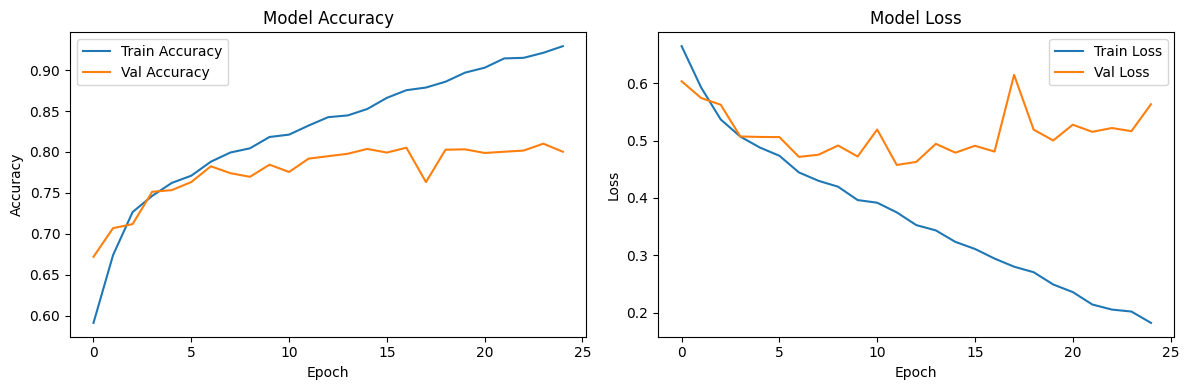

In [63]:
history = cnn.fit(
    x=training_set,
    validation_data=test_set,
    epochs=25
)


def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_history(history)

In [68]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
test_image_path = '/kaggle/input/dogsssss/(2).jpeg'  # Buraya mevcut dosya ismini koyun

test_image = image.load_img(test_image_path, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = cnn.predict(test_image)
prediction = 'dog' if result[0][0] == 1 else 'cat'

print(f'Predicted label: {prediction}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted label: dog


In [69]:
cnn.save("final.h5")